In [1]:
import os,sys
import csv
import copy
import math
import collections

import matplotlib
import matplotlib.pyplot as plt
from clawpack import pyclaw
from clawpack import riemann
import numpy as np
from scipy.integrate import simps, trapz
from scipy.interpolate import interp1d

sys.path.append("/pymorph")
from schemes.weno import get_left_flux,get_right_flux
from schemes.weno import get_stencil
import sediment_transport.sed_trans as sedtrans

from models.shallow_water_solver import shallow_water_solver
from schemes.avalanche_scheme import *

from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display, Math, Latex

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.style.use(['default'])

In [2]:

#filepath = '/home/pgrover/working/working/Paper_4_Turbulence_Modelling/FlumeExperiment/geometries/flume_profile_smoothed.txt'
filepath = 'flume_profile_smoothed_v002.txt'

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
retval = collections.OrderedDict()


z = []
with open(filepath) as f:
    for line in f:
        values = line.split()
        if is_number(values[0])==False:
            if float(values[1]).is_integer():
                retval[values[0]]=int(values[1])
            else:
                retval[values[0]]=float(values[1])
        else:
            z.append(float(values[0]))
z = np.array(z)
print('Z: {0}'.format(len(z)))
xmax = float(retval['nrows']) * retval['cellsize']
nx = retval['nrows']
dx = retval['cellsize']

#--------------------------------
# Increase the resolution on the grid
#--------------------------------
resolution = 0.5
x = np.linspace(0, nx*dx, num=len(z))
f = interp1d(x, z)
xnew = np.linspace(0, nx*dx, num=len(z)*resolution)
znew = f(xnew)
nx = len(xnew)

print('Finished reinterpolating the grid nx={0}'.format(len(xnew)))


Z: 87
Finished reinterpolating the grid nx=43


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


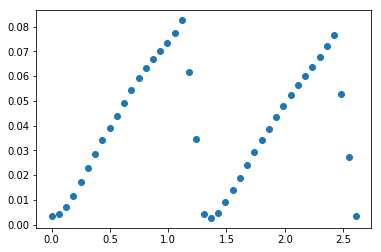

In [3]:
plt.plot(xnew,znew, 'o')

In [4]:
sws = shallow_water_solver(kernel_language='Fortran')
sws.set_solver(max_steps=10000)
sws.set_state_domain(xnew,znew)
sws.set_mannings_source_term(mannings=0.025, slope=1.26/1000.)
sws.set_boundary_conditions()
sws.set_inital_conditions(0.237, 0.0)
sws.set_controller(tfinal=200., num_output_times=15)
sws.run()
cntrl = sws.get_controller()

for i in range(cntrl.num_output_times):
    surf20 = cntrl.frames[i].q[0,:] + znew
    plt.plot(xnew,surf)
    
    depth20 = cntrl.frames[i].q[0,:]
    u20 = cntrl.frames[i].q[1,:]/depth20
    
plt.plot(xnew,znew)





Error: error code 16
[0] VecView() line 590 in /tmp/pip-install-zpqu7s7y/petsc/src/vec/vec/interface/vector.c
[0] VecView_MPI_DA() line 714 in /tmp/pip-install-zpqu7s7y/petsc/src/dm/impls/da/gr2.c
[0] DMDAArrayMPIIO() line 614 in /tmp/pip-install-zpqu7s7y/petsc/src/dm/impls/da/gr2.c
[0] PetscViewerBinaryWrite() line 942 in /tmp/pip-install-zpqu7s7y/petsc/src/sys/classes/viewer/impls/binary/binv.c
[0] PetscViewerSetUp() line 337 in /tmp/pip-install-zpqu7s7y/petsc/src/sys/classes/viewer/interface/view.c
[0] PetscViewerSetUp_Binary() line 1361 in /tmp/pip-install-zpqu7s7y/petsc/src/sys/classes/viewer/impls/binary/binv.c
[0] PetscViewerFileSetUp_BinaryMPIIO() line 1295 in /tmp/pip-install-zpqu7s7y/petsc/src/sys/classes/viewer/impls/binary/binv.c

In [ ]:
fig = plt.figure(figsize=(12, 4))
plt.plot(xc,surf20)
plt.plot(xc,zc20,'r')

In [ ]:
plt.plot(xc, u20)

u20.mean()

In [ ]:
tau20 = np.zeros(nx)
for i in range(0,nx): #i=2
    tau20[i] = sedtrans.get_bed_shear(depth20[i],u20[i],D50)
    
plt.plot(xc,tau20,'c-')

plt.plot(xc,zc,'r')


In [ ]:
tau20 = np.zeros(nx)
for i in range(0,nx): #i=2
    tau20[i] = sedtrans.get_bed_shear(h20[i],u20[i],D50)
    
plt.plot(xc,tau20,'c-')

plt.plot(xc,zc,'r')



In [ ]:
sws = shallow_water_solver(kernel_language='Fortran')
sws.set_solver(max_steps=10000)
sws.set_state_domain(xnew,znew)
sws.set_mannings_source_term(mannings=0.025, slope=1.26/1000.)
sws.set_boundary_conditions()
sws.set_inital_conditions(0.357, 0.0)
sws.set_controller(tfinal=200., num_output_times=15)
sws.run()
cntrl = sws.get_controller()

for i in range(cntrl.num_output_times):
    surf32 = cntrl.frames[i].q[0,:] + znew
    plt.plot(xnew,surf)
    
    depth32 = cntrl.frames[i].q[0,:]
    u32 = cntrl.frames[i].q[1,:]/depth32
    
plt.plot(xnew,znew)

In [5]:
fig = plt.figure(figsize=(12, 4))
plt.plot(xc,surf32)
plt.plot(xc,surf20)
plt.plot(xc,zc20,'r')

NameError: name 'xc' is not defined

<Figure size 864x288 with 0 Axes>

In [ ]:
plt.plot(xc, u20, label='20 cm')
plt.plot(xc, u32, label='32cm')
plt.legend()

In [ ]:
tau32 = np.zeros(nx)
for i in range(0,nx): #i=2
    tau32[i] = sedtrans.get_bed_shear(depth32[i],u32[i],D50)
    
plt.plot(xc,tau32,'c-')

plt.plot(xc,zc,'r')

In [ ]:
import pandas as pd
filepath = r'/data/PhD/LRN-WallTreatments-openFOAM-5.x/validation//QueensFlume/35.7.cm/dune.127z.30r.s.9.6.colebrook.yp.0.x/300/wallShearStress.txt'
print(os.path.exists(filepath))
tau32df = pd.read_csv(filepath, sep='\t', index_col=0)

filepath = r'/data/PhD/LRN-WallTreatments-openFOAM-5.x/validation//QueensFlume/23.7.cm/dune.100z.40r.s.0.96.colebrook.yp.0.x/300/wallShearStress.txt'
tau20df = pd.read_csv(filepath, sep='\t', index_col=0)

In [ ]:
tau_cr = sedtrans.get_critical_shear(D50, rho_particule)
fig = plt.figure(figsize=(12, 8))
plt.axhline(tau_cr)
plt.plot(xc,tau32,'c-',label='Shallow')
plt.plot(tau32df.index,tau32df.tau*-1000.,'g-', label='OpenFOAM')
plt.plot(xc,zc*1.5,'r')
plt.ylim([-3., 4.5])
plt.ylabel('Shear Stress (Pa)')
plt.legend()

In [ ]:
tau_cr = sedtrans.get_critical_shear(D50, rho_particule)
fig = plt.figure(figsize=(12, 6))
plt.axhline(tau_cr)
plt.plot(xc,tau20,'c-',label='Shallow')
plt.plot(xc,tau32,'c-',label='Shallow')
#plt.plot(tau20df.index,tau20df.tau*-1000.,'g-', label='OpenFOAM')
plt.plot(xc,zc*3.5,'r')
plt.ylim([-3., 4.5])
plt.ylabel('Shear Stress (Pa)')
plt.legend()

## Now Prorate the shear stress to account for the recirculation zone

In [44]:
tau20df.to_csv('tau20df.csv')

In [16]:
tau32df.to_csv('tau32df.csv')

In [17]:
flowsShallow={}
flowsShallow['xc'] = xc
flowsShallow['tau20'] = tau20
flowsShallow['tau32'] = tau32
flowShallowDF = pd.DataFrame(flowsShallow)

In [18]:
flowShallowDF.to_csv('flowShallowDF.csv')

In [36]:
tau32df

,tau
x,
0.000090,4.752500e-07
0.000251,1.419500e-06
0.000258,1.613500e-06
0.000330,2.096300e-06
0.000349,2.239100e-06
0.000391,2.534300e-06
0.000411,2.677500e-06
0.000430,2.837700e-06
0.000435,8.640600e-06
